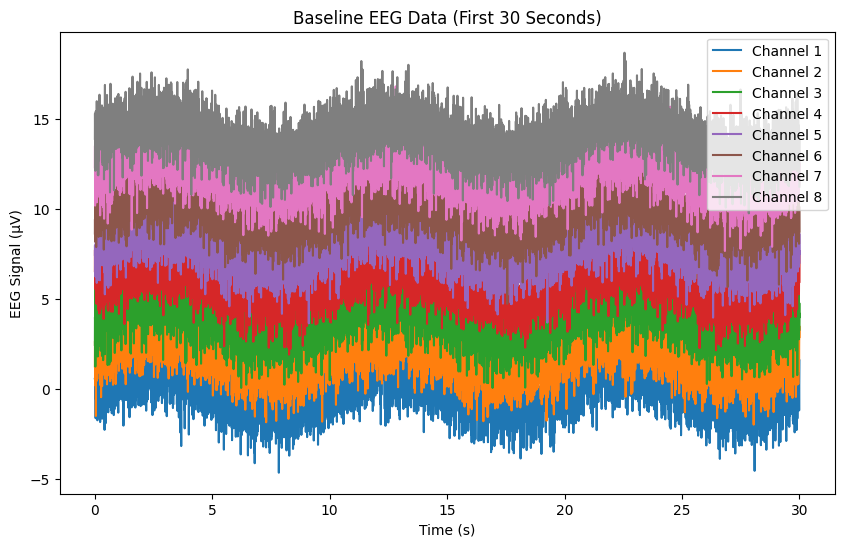

Baseline Mean: [-0.0091395  -0.02114813  0.00687513 -0.01126923  0.0215593   0.01224889
 -0.00180612 -0.0010066 ]
Baseline Std Dev: [1.22374394 1.20453883 1.23197291 1.21303315 1.23463294 1.22857997
 1.20267534 1.23364421]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 模拟的EEG信号：假设采样率250Hz，前30秒数据
sampling_rate = 250  # 采样率 250 Hz
duration_baseline = 30  # 前30秒数据
time_baseline = np.linspace(0, duration_baseline, duration_baseline * sampling_rate)  # 时间戳

# 模拟的EEG信号（8个通道）
# 每个通道的信号会有不同的频率成分，模拟平稳状态
baseline_data = np.random.normal(0, 1, (8, len(time_baseline)))  # 每个通道的噪声信号
baseline_data += np.sin(2 * np.pi * 0.1 * time_baseline)  # 模拟轻微的低频信号（冷静状态）

# 计算基线的均值和标准差（假设基线数据为冷静状态）
baseline_mean = np.mean(baseline_data, axis=1)
baseline_std = np.std(baseline_data, axis=1)

# 绘制基线数据
plt.figure(figsize=(10, 6))
for i in range(8):
    plt.plot(time_baseline, baseline_data[i] + i * 2, label=f"Channel {i+1}")
plt.title("Baseline EEG Data (First 30 Seconds)")
plt.xlabel("Time (s)")
plt.ylabel("EEG Signal (μV)")
plt.legend()
plt.show()

# 输出基线统计信息（用于后续判断激动状态）
print("Baseline Mean:", baseline_mean)
print("Baseline Std Dev:", baseline_std)


In [18]:
import numpy as np
from scipy.signal import welch

# 设置EEG信号模拟数据
eeg_signal = np.random.normal(0, 1, (8, 250 * 90))  # 假设8通道数据，1分钟（250数据点/秒）+ 30秒冷静数据

# 频段设置
bands = {
    "Delta": (0.5, 4),
    "Theta": (4, 8),
    "Alpha": (8, 13),
    "Beta": (13, 30),
    "Gamma": (30, 100)
}

# 计算EEG频段的功率
def calculate_band_powers(signal, fs=250):
    f, Pxx = welch(signal, fs=fs, nperseg=fs)
    band_powers = {}
    
    for band, (low, high) in bands.items():
        # 确保频段的上下限都在有效频率范围内
        low_idx = np.searchsorted(f, low)  # 查找低频限的索引
        high_idx = np.searchsorted(f, high)  # 查找高频限的索引
        
        # 确保索引在范围内
        low_idx = max(0, low_idx)
        high_idx = min(len(f), high_idx)

        band_power = np.sum(Pxx[low_idx:high_idx])  # 获取该频段的功率
        band_powers[band] = band_power
    
    return band_powers

# 计算前30秒（冷静）数据，获得baseline
baseline_band_powers = []
for i in range(30):  # 前30秒
    signal_segment = eeg_signal[:, i*250:(i+1)*250]
    band_powers = calculate_band_powers(signal_segment)
    baseline_band_powers.append(band_powers)

# 计算baseline（Alpha与Beta波的平均功率）
baseline_alpha = np.mean([bp["Alpha"] for bp in baseline_band_powers])
baseline_beta = np.mean([bp["Beta"] for bp in baseline_band_powers])

# 输出baseline的Alpha和Beta波功率，检查是否合理
print(f"Baseline Alpha power: {baseline_alpha}")
print(f"Baseline Beta power: {baseline_beta}")

# 游戏开始后实时追踪情绪状态
emotional_states = []
threshold_alpha = 1.5  # 假设Alpha波的阈值，适当调整
threshold_beta = 0.5   # 假设Beta波的阈值，适当调整

for i in range(30, eeg_signal.shape[1] // 250):  # 从第31秒开始，每秒更新一次
    signal_segment = eeg_signal[:, i*250:(i+1)*250]
    band_powers = calculate_band_powers(signal_segment)

    # 输出每秒的Alpha与Beta波功率，检查变化
    print(f"Second {i+1}: Alpha power: {band_powers['Alpha']}, Beta power: {band_powers['Beta']}")

    # 基于baseline判断当前情绪
    alpha_ratio = band_powers["Alpha"] / baseline_alpha
    beta_ratio = band_powers["Beta"] / baseline_beta

    # 计算情绪状态
    if alpha_ratio > threshold_alpha and beta_ratio < threshold_beta:
        emotional_states.append("Calm")  # 冷静
    else:
        emotional_states.append("Excited")  # 激动

# 打印前60秒的情绪状态（游戏开始后）
for second in range(60):
    print(f"Second {second + 31}: {emotional_states[second]}")


Baseline Alpha power: 0.0
Baseline Beta power: 0.0
Second 31: Alpha power: 0.0, Beta power: 0.0
Second 32: Alpha power: 0.0, Beta power: 0.0
Second 33: Alpha power: 0.0, Beta power: 0.0
Second 34: Alpha power: 0.0, Beta power: 0.0
Second 35: Alpha power: 0.0, Beta power: 0.0
Second 36: Alpha power: 0.0, Beta power: 0.0
Second 37: Alpha power: 0.0, Beta power: 0.0
Second 38: Alpha power: 0.0, Beta power: 0.0
Second 39: Alpha power: 0.0, Beta power: 0.0
Second 40: Alpha power: 0.0, Beta power: 0.0
Second 41: Alpha power: 0.0, Beta power: 0.0
Second 42: Alpha power: 0.0, Beta power: 0.0
Second 43: Alpha power: 0.0, Beta power: 0.0
Second 44: Alpha power: 0.0, Beta power: 0.0
Second 45: Alpha power: 0.0, Beta power: 0.0
Second 46: Alpha power: 0.0, Beta power: 0.0
Second 47: Alpha power: 0.0, Beta power: 0.0
Second 48: Alpha power: 0.0, Beta power: 0.0
Second 49: Alpha power: 0.0, Beta power: 0.0
Second 50: Alpha power: 0.0, Beta power: 0.0
Second 51: Alpha power: 0.0, Beta power: 0.0
Seco

C:\Users\yuhan\AppData\Local\Temp\ipykernel_11744\3431609341.py:63: RuntimeWarning: invalid value encountered in scalar divide
  alpha_ratio = band_powers["Alpha"] / baseline_alpha
C:\Users\yuhan\AppData\Local\Temp\ipykernel_11744\3431609341.py:64: RuntimeWarning: invalid value encountered in scalar divide
  beta_ratio = band_powers["Beta"] / baseline_beta
